In [41]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

Running a Monte Carlo simulation to simulate 10 different versions of Microsoft's stock price for the next 500 days. 

In [40]:
stock = ['MSFT']
data = pd.DataFrame()
data[stock] = wb.DataReader(stock, data_source = 'yahoo', start = '2010-1-1')['Adj Close']

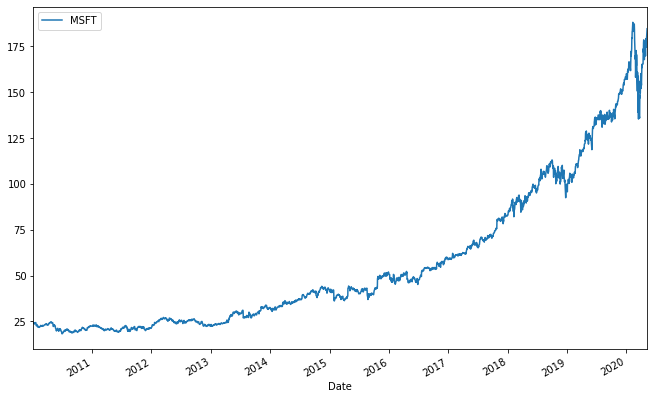

In [4]:
data.plot(figsize=(11,7))

In [13]:
log_returns = np.log(1+data.pct_change())
log_returns.tail()

,MSFT
Date,
2020-05-04,0.024166
2020-05-05,0.010679
2020-05-06,0.009799
2020-05-07,0.005790
2020-05-08,0.005865


Geometric brownian motion says that St = S0 * e^r where r is a function of the drift, variance and standard brownian motion

In [17]:
m = log_returns.mean()
variance = log_returns.var()

In [18]:
drift = m - (0.5 * variance)
drift

MSFT    0.000654
dtype: float64

In [25]:
std = log_returns.std()
std

MSFT    0.015817
dtype: float64

Brownian motion = r = drift + std * Z(0,1) where Z is a random variable which can take on values between 0 and 1. We are predicting 10 different versions of MSFT's stock price for the next 500 days based on the historical that we have

In [23]:
t_intervals = 500
iterations = 10

In [24]:
d_returns = np.exp(drift.values + std.values * norm.ppf(np.random.rand(t_intervals, iterations)))
d_returns

array([[0.99926869, 1.01319872, 0.98699065, ..., 1.00493765, 0.981223  ,
        0.9869501 ],
       [1.01221578, 1.0166501 , 1.00614003, ..., 0.99999187, 0.98326088,
        0.96652724],
       [0.98437575, 1.01368796, 1.01740046, ..., 0.99949486, 0.99654686,
        0.98649812],
       ...,
       [1.00886145, 0.99073814, 0.98942128, ..., 0.9915533 , 1.00524701,
        0.98903603],
       [1.00816237, 1.0039736 , 0.99695151, ..., 1.01429493, 1.02654391,
        0.99048421],
       [1.01601326, 0.98640482, 1.0154562 , ..., 1.01741581, 0.9878289 ,
        0.98354181]])

St = S0 * daily_return[t]

In [29]:
S0 = data.iloc[-1]
S0

MSFT    184.679993
Name: 2020-05-08 00:00:00, dtype: float64

Have another array of the same size as d_returns, fill it with 0s. Let the first row of this new array be the last value from the historical returns i.e 184. We need the 10 different versions of the stock prices to start off with this number.

In [27]:
future_prices = np.zeros_like(d_returns)
future_prices

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [28]:
future_prices[0] = S0
future_prices

array([[184.67999268, 184.67999268, 184.67999268, ..., 184.67999268,
        184.67999268, 184.67999268],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [34]:
for t in range(1, t_intervals):
    future_prices[t] = future_prices[t-1] * d_returns[t]
future_prices

array([[184.67999268, 184.67999268, 184.67999268, ..., 184.67999268,
        184.67999268, 184.67999268],
       [186.93600313, 187.7549321 , 185.81393389, ..., 184.67849129,
        181.58861258, 178.49824296],
       [184.01526781, 190.32491418, 189.04718248, ..., 184.58520312,
        180.96156186, 176.088181  ],
       ...,
       [463.80219104, 323.28592748, 224.77185534, ..., 122.43524549,
        169.26646148, 257.11760045],
       [467.58791427, 324.57053777, 224.08663947, ..., 124.18544823,
        173.75945495, 254.67092208],
       [475.07552186, 320.15794375, 227.55016652, ..., 126.34823901,
        171.64461051, 250.47949992]])

Now lets generate a plot of the 10 different simulations

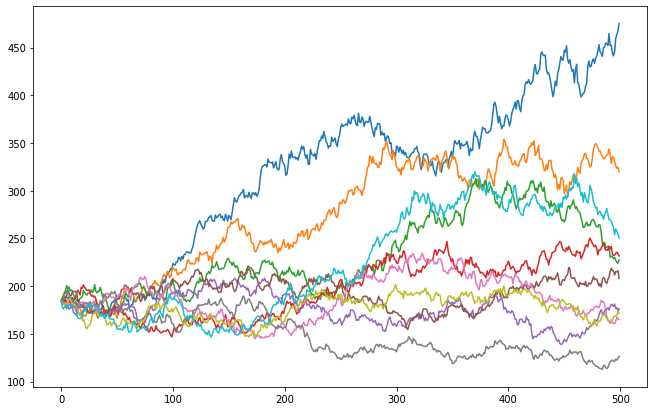

In [33]:
plt.figure(figsize=(11,7))
plt.plot(future_prices)

In [38]:
avg_final_price = future_prices.mean()
avg_final_price

213.0143432786946

In [36]:
future_prices.max()

475.07552185926147

In [37]:
future_prices.min()

112.61039383650795

In [39]:
final_avg_return = avg_final_price / data.iloc[-1]
final_avg_return

MSFT    1.153424
Name: 2020-05-08 00:00:00, dtype: float64

Based on this simulation only (excluding all other factors), I can conclude MSFT would be a good investment. On avg, taking into account all 10 simulations, we can hopefully expect a 15% return after 500 days, with more possiilities of the stocks going over the final historical price of $184 than going below it. However, there are a lot more factors involved when it comes to investing. This is not investment advice. Other factors, such as PE ratio, beta, fundamentals etc should be looked at before investing. 